In [2]:
%cd harmonics

/home/matias/HDD/Dropbox/apps/harmonics/harmonics


In [39]:
import pandas as pd
import yaml
import importlib
import audio as a, midi as m, harmonics as h, bot as b
def rel():
    for module in [a,m,h,b]:
        importlib.reload(module)
from mido import MidiFile
import mido
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import numba
rel()

In [40]:
t = harmonics.Tune('../data/popsongs/Finland_Natant.mid')

extraction took 0.020366191864013672 seconds


In [41]:
seq = h.Sequence([h.Note(i) for i in range(0,127)])

In [42]:
seq.df

,message_type,instrument,pitch,volume,duration
0,note_on,0,0,100,1
1,note_on,0,1,100,1
2,note_on,0,2,100,1
3,note_on,0,3,100,1
4,note_on,0,4,100,1
...,...,...,...,...,...
122,note_on,0,122,100,1
123,note_on,0,123,100,1
124,note_on,0,124,100,1
125,note_on,0,125,100,1


In [17]:
notes = t.get(t='note_off')

In [18]:
def quantitize(n):
    bins = np.array([0, 0.125, 0.29, 0.4, 0.58, 0.7, 0.875])
    vals = np.array([0, 0.25,  0.33, 0.5, 0.66, 0.75, 0])
    return vals[np.digitize(n,bins)-1]
quantitize(0.33333333)

0.33

In [24]:
nd = h.NoteData('note_on',9,60,110,56)

In [43]:
np.sum(np.array([False,True]))

1

In [24]:
string.ascii_letters[26:33,30:33]

SyntaxError: invalid syntax (196099525.py, line 1)

In [44]:
{1:2,2:3}

{1: 2, 2: 3}

In [41]:
MIDICT = {k:v for k,v in zip(np.arange(12)%12,list('C.D.EF.G.A.B')) if v != '.'}
MIDICT = {k : f'\033[{_}m{v}\033[0m' 
               for (k,v),_ in zip(MIDICT.items(),range(30,38))}
for k in MIDICT.values():
    print(k,)

C 5
D 5
E 5
F 5
G 5
A 5
B 5


In [43]:
import string
import numpy as np
def f(midi):
    return {k:v for k,v in zip(np.arange(12)%12,list('C.D.EF.G.A.B'))}[midi%12]+str(midi//12-1)
vf = np.vectorize(f)
vf(np.arange(60,120))

array(['C4', '.4', 'D4', '.4', 'E4', 'F4', '.4', 'G4', '.4', 'A4', '.4',
       'B4', 'C5', '.5', 'D5', '.5', 'E5', 'F5', '.5', 'G5', '.5', 'A5',
       '.5', 'B5', 'C6', '.6', 'D6', '.6', 'E6', 'F6', '.6', 'G6', '.6',
       'A6', '.6', 'B6', 'C7', '.7', 'D7', '.7', 'E7', 'F7', '.7', 'G7',
       '.7', 'A7', '.7', 'B7', 'C8', '.8', 'D8', '.8', 'E8', 'F8', '.8',
       'G8', '.8', 'A8', '.8', 'B8'], dtype='<U2')

In [ ]:
def generate_note()

In [19]:
notes

,track,type,channel,data1,data2,miditime,duration,tick_time,hex_msg,beat_time,beat_pos,curr_beat,rel_beat,bar_time,curr_bar,bar_pos,q_beat_p
6,1,note_off,0,64,88.0,48,0,96,80 40 58,1.000000,0.000000,1.0,1.0,0.333333,0.0,0.333333,0.0
8,1,note_off,0,61,88.0,48,0,144,80 3D 58,1.500000,0.500000,1.0,1.0,0.500000,0.0,0.500000,0.5
10,1,note_off,0,62,88.0,48,0,192,80 3E 58,2.000000,0.000000,2.0,2.0,0.666667,0.0,0.666667,0.0
12,1,note_off,0,64,88.0,144,0,336,80 40 58,3.500000,0.500000,3.0,3.0,1.166667,1.0,0.166667,0.5
14,1,note_off,0,69,88.0,48,0,384,80 45 58,4.000000,0.000000,4.0,1.0,1.333333,1.0,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,6,note_off,1,52,82.0,48,0,5376,81 34 52,56.000000,0.000000,56.0,2.0,18.666667,18.0,0.666667,0.0
141,6,note_off,1,57,82.0,83,0,5472,81 39 52,57.000000,0.000000,57.0,3.0,19.000000,19.0,0.000000,0.0
143,6,note_off,1,61,82.0,96,0,5568,81 3D 52,58.000000,0.000000,58.0,1.0,19.333333,19.0,0.333333,0.0
146,6,note_off,1,59,82.0,70,0,5664,81 3B 52,59.000000,0.000000,59.0,2.0,19.666667,19.0,0.666667,0.0


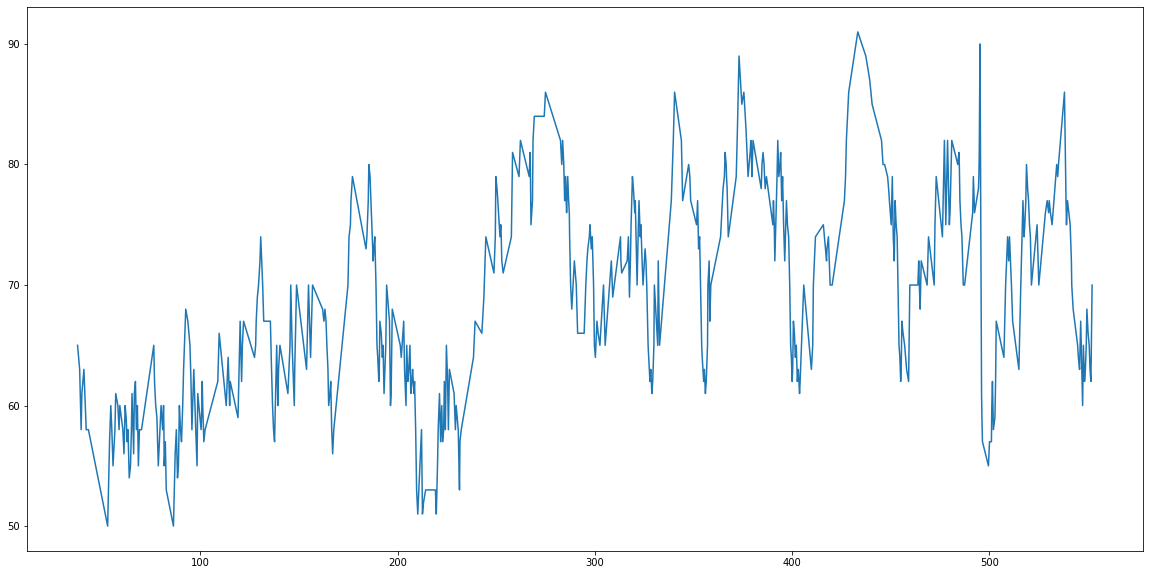

In [48]:
plt.figure(figsize=(20,10))
plt.plot(notes.beat_time,notes.data1)

In [6]:
t.df[t.df.track ==9]

,track,type,channel,data1,data2,duration,tick_time,hex_msg,beat_time,beat_pos,curr_beat,rel_beat,bar_time,curr_bar,bar_pos,q_beat_p


In [7]:
f(t.df.beat_position.to_numpy())

NameError: name 'f' is not defined

In [ ]:
%timeit f(t.df.beat_position.to_numpy())

In [ ]:
(t.df.tick_time/480)%1

In [ ]:
t.get(9,'note_on')

In [ ]:
a = np.random.rand(12)*15

In [ ]:
a

In [ ]:
a%1

In [ ]:
t.get(1,'note_off')

In [ ]:
t.metamessages

In [ ]:
df = t['notes']

In [ ]:
df[df['channel']==4]

In [ ]:
if 1 and 'klj':
    print('hai')